# Cyfrowe przetwarzanie sygnałów i obrazów
## Laboratorium


## Przetwarzanie i analiza sygnału EKG
- Igor Wlodarczyk
- Jakub Kalecki

## Ćwiczenie 1

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as sig

- ekg1.txt

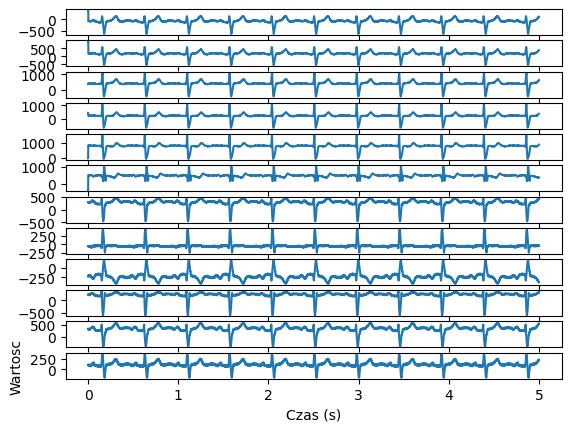

In [8]:
tab = np.loadtxt('ekg1.txt')
tab = np.rot90(tab)
fig, axs = plt.subplots(len(tab))
number_of_samples = len(tab[0])
x = np.arange(0, number_of_samples / 1000, 1 / 1000)
for idx, column in enumerate(tab):
    axs[idx].plot(x, column)
plt.ylabel('Wartosc')
plt.xlabel('Czas (s)') 
plt.show()

- ekg1.txt - wybrane wykresy i przedział czasowy

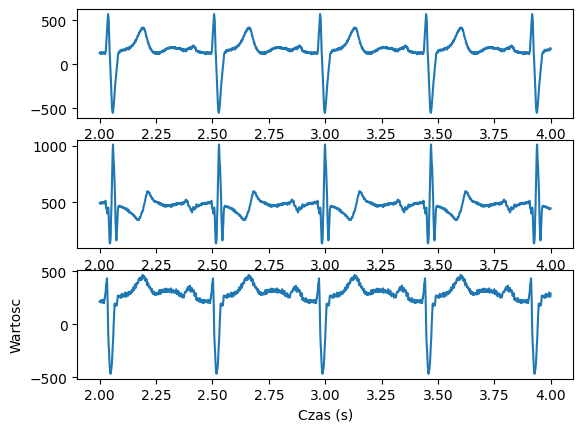

In [10]:
specific_charts = [1, 5, 6]
time_slice = (2, 4)
tab = np.loadtxt('ekg1.txt')
tab = np.rot90(tab)
tab = [y for idx, y in enumerate(tab) if idx in specific_charts]
fig, axs = plt.subplots(len(tab))
number_of_samples = len(tab[0])
x = np.arange(0, number_of_samples / 1000, 1 / 1000)
start_time, end_time = time_slice
start_index = next(idx for idx, value in enumerate(x) if value >= start_time)
end_index = next(idx for idx, value in enumerate(x) if value >= end_time)
x = x[start_index:end_index]
for index, column in enumerate(tab):
    tab[index] = column[start_index:end_index]
for idx, column in enumerate(tab):
    axs[idx].plot(x, column)
plt.ylabel('Wartosc')
plt.xlabel('Czas (s)') 
plt.show()

- ekg100.txt

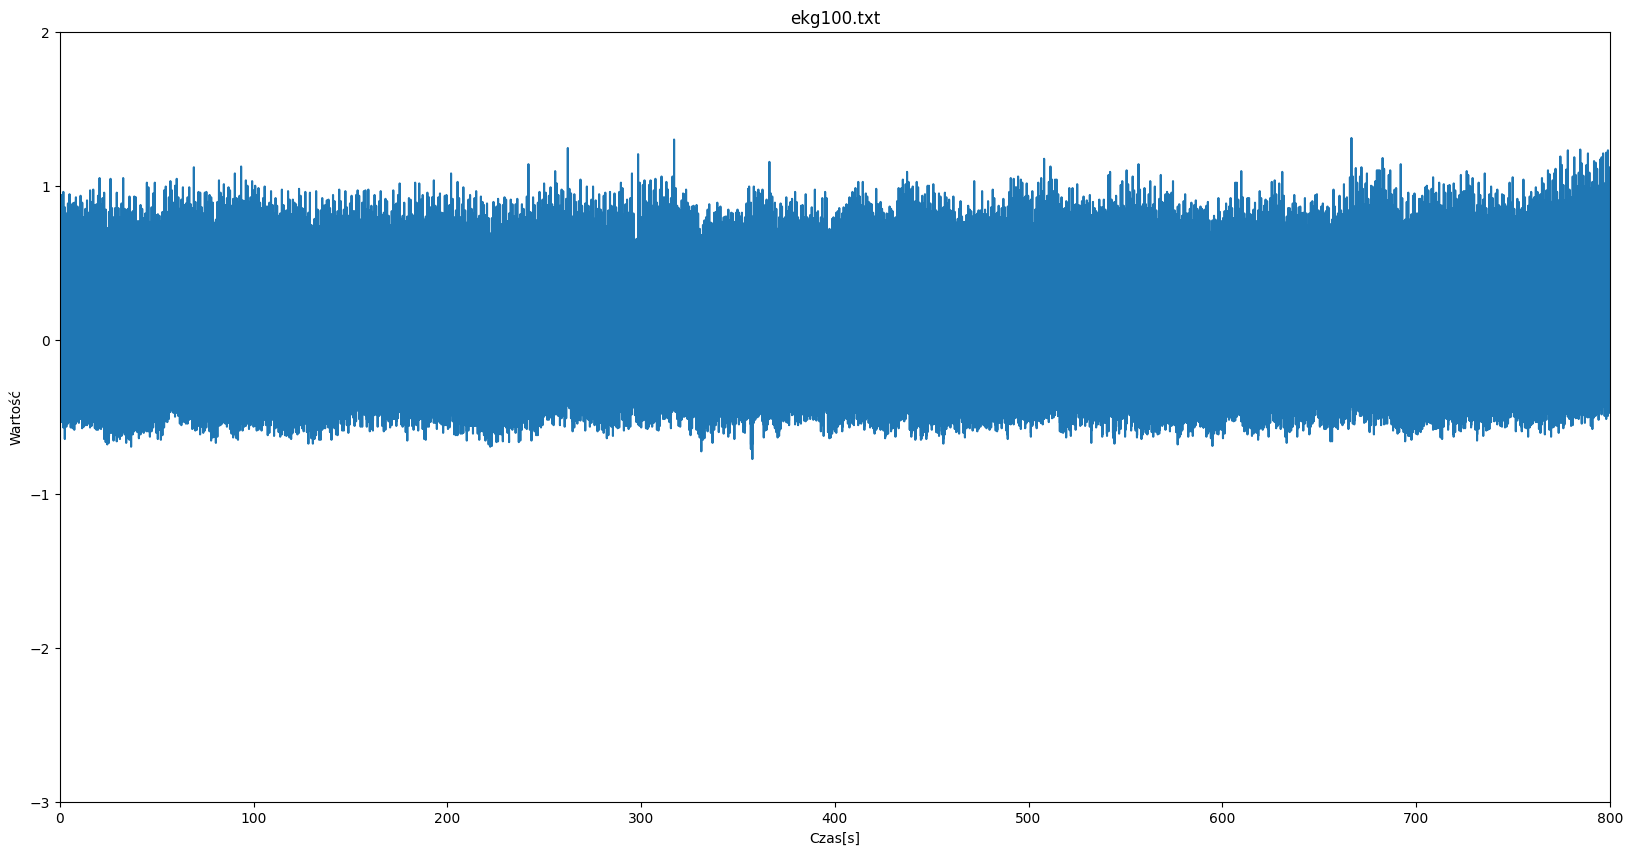

In [11]:
ekg100 = pd.read_csv('ekg100.txt', names=['1'])
sampling_frequency_ekg100 = 360

ekg100['Czas'] = ekg100.index/sampling_frequency_ekg100 
ekg100 = ekg100.set_index('Czas') 

plt.figure(figsize=(20,10))
plt.plot(ekg100.index, ekg100['1'])
plt.title('ekg100.txt')
plt.xlabel('Czas[s]')
plt.ylabel('Wartość')
plt.xlim(0,800)
plt.ylim(-3,2.0)
plt.show()

ekg_noise.txt

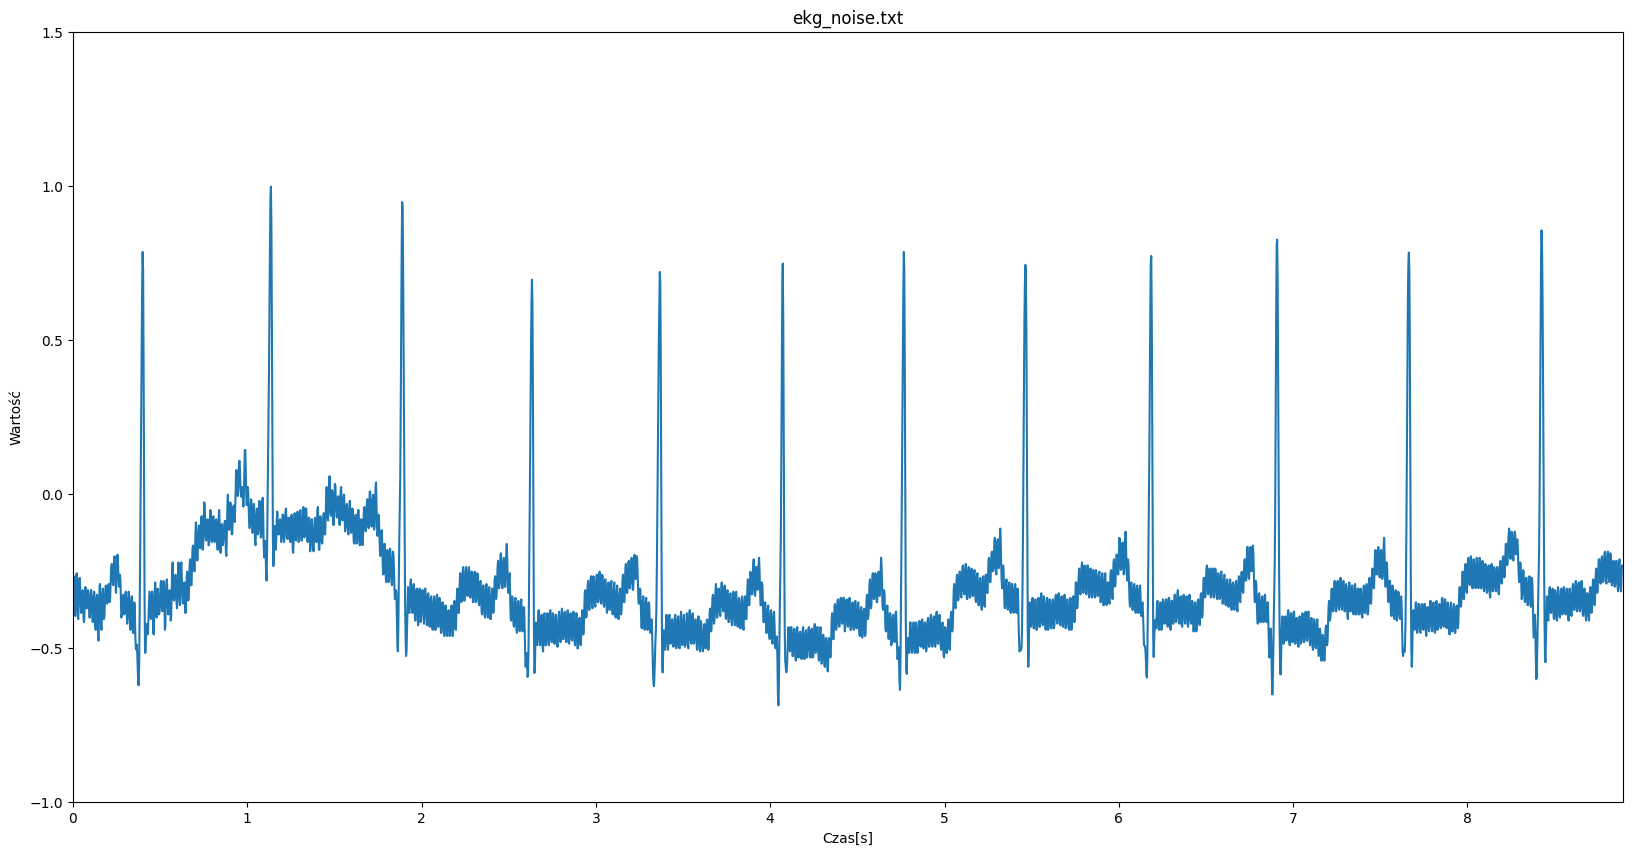

In [15]:
ekg_noise = pd.read_csv('ekg_noise.txt', names=['Czas', 'Wartosc amplitudy'], sep=r'\s+')
sampling_frequency_ekg_noise = 360 

ekg_noise['Czas'] = ekg_noise.index/sampling_frequency_ekg_noise 
ekg_noise = ekg_noise.set_index('Czas')
ekg_noise_time = ((ekg_noise.shape[0])/sampling_frequency_ekg_noise)

plt.figure(figsize=(20,10))
plt.plot(ekg_noise.index, ekg_noise['Wartosc amplitudy'])
plt.title('ekg_noise.txt')
plt.xlabel('Czas[s]')
plt.ylabel('Wartość')
plt.xlim(0, ekg_noise_time)
plt.ylim(-1.0,1.5)

plt.show()

## Ćwiczenie 2

- Wygeneruj ciąg próbek odpowiadający fali sinusoidalnej o częstotliwości 50 Hz i długości 65536.

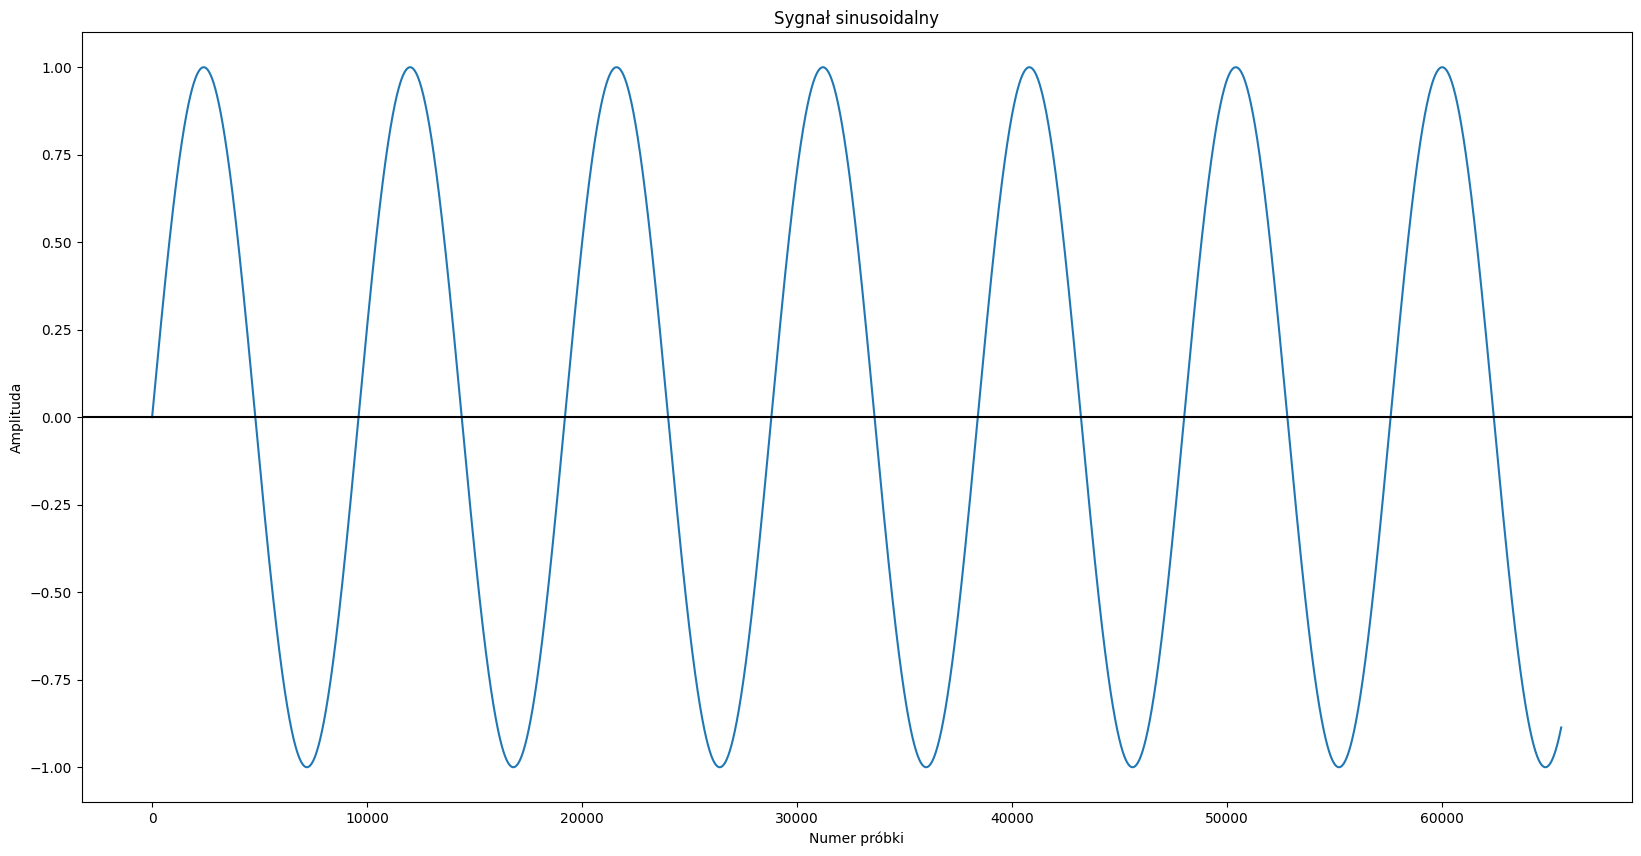

In [16]:
f = 50
length = 65_536
N = np.arange(length)
fs = 480_000

sinus = np.sin(2 * N * np.pi * f/fs) #sin(2 * pi * f * t), t = 1/fs

plt.figure(figsize=(20,10))
plt.plot(N, sinus)
plt.title('Sygnał sinusoidalny')
plt.ylabel('Amplituda')
plt.xlabel('Numer próbki')
plt.axhline(y=0, color='black')
plt.show()

- Wyznacz dyskretną transformatę Fouriera tego sygnału i przedstaw jego widmo amplitudowe na wykresie w zakresie częstotliwości [0, fs/2], gdzie fs oznacza częstotliwość próbkowania.